# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np

2022-11-03 20:55:52.366284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


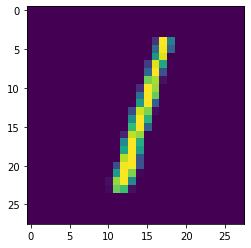

In [4]:
plt.imshow(x_test[2])

In [5]:
import numpy as np
np.max(x_train[2])

255

In [6]:
y_train[2]

4

In [7]:
28*28

784

In [8]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [39]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

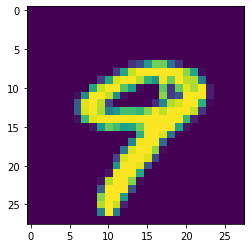

In [21]:
plt.imshow(x_test[9].reshape(28,28))

In [75]:
keras.utils.to_categorical(y_train, num_classes=None)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [76]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=None)
y_test = keras.utils.to_categorical(y_test, num_classes=None)

In [79]:
batch_size = 128
num_classes = 10
epochs = 20


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 


2022-11-02 20:05:23.648907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 14s 28ms/step - loss: 0.2455 - accuracy: 0.9251 - val_loss: 0.1326 - val_accuracy: 0.9584
Epoch 2/20
469/469 [==============================] - 17s 35ms/step - loss: 0.1004 - accuracy: 0.9693 - val_loss: 0.0883 - val_accuracy: 0.9731
Epoch 3/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 14s 29ms/step - loss: 0.0610 - accuracy: 0.9823 - val_loss: 0.0762 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [80]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [81]:
batch_size = 128
num_classes = 10
epochs = 12


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 74s 157ms/step - loss: 2.2828 - accuracy: 0.1403 - val_loss: 2.2433 - val_accuracy: 0.3244
Epoch 2/12
469/469 [==============================] - 82s 175ms/step - loss: 2.2216 - accuracy: 0.2460 - val_loss: 2.1683 - val_accuracy: 0.5670
Epoch 3/12
469/469 [==============================] - 73s 155ms/step - loss: 2.1451 - accuracy: 0.3597 - val_loss: 2.0708 - val_accuracy: 0.6704
Epoch 4/12
469/469 [==============================] - 71s 151ms/step - loss: 2.0433 - accuracy: 0.4493 - val_loss: 1.9426 - val_accuracy: 0.7221
Epoch 5/12
469/469 [==============================] - 74s 158ms/step - loss: 1.9149 - accuracy: 0.5145 - val_loss: 1.7797 - val_accuracy: 0.7536
Epoch 6/12
469/469 [==============================] - 162s 345ms/step - loss: 1.7605 - accuracy: 0.5595 - val_loss: 1.5879 - val_accuracy: 0.7761
Epoch 7/12
469/469 [==============================] - 89s 188ms/step - loss: 1.5888 - accuracy: 0.6035 - val_loss: 1.3843 - val_a

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7264227867126465
Test accuracy: 0.8447999954223633


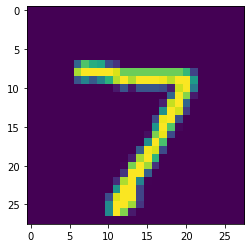

In [25]:
plt.imshow(x_test[0].reshape(28,28))

In [60]:
model.predict(x_test[0:1]), y_test[:1]

(array([[  8.03459201e-08,   1.38438466e-07,   4.18382228e-07,
           3.68611836e-06,   3.55962615e-09,   2.90193564e-10,
           2.80381187e-12,   9.99995351e-01,   1.96343386e-08,
           3.15586846e-07]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]]))

In [61]:
model.predict_classes(x_test[0:1]), y_test[:1]

1/1 [==============================] - 0s


(array([7]), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]]))